## Load the Libraries

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
data = pd.read_csv('Datasets/nyc_taxi_trip_duration.csv')

In [3]:
#checking the size of the dataset
data.shape

(729322, 11)

In [4]:
#checking the dataset by examining the top 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
#checking the datatypes of all the columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
#Trip duration in hours
data['trip_duration_hours'] = data['trip_duration'].apply(lambda x : x/3600)

In [7]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hours
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556


In [8]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [9]:
# Removing outliers

mean = data['passenger_count'].mean()
std = data['passenger_count'].std()

data['z_score'] = (data['passenger_count']-mean)/std

thresh = 4

data = data[data['z_score'].abs() < thresh]

data=data[data.passenger_count!=0]

In [10]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

## Checking for Null Values

In [11]:
data.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
trip_duration_hours    0
z_score                0
dtype: int64

## Evaluation Metrics

Here the Target variable is continuous in nature hence it is a Regression model. The most commonly used Evaluation metric for Regression problem is RMSE(Root Mean Squared Error) as it makes sure the unit does not change.

## Benchmark Model

In [12]:
bench_data = data
bench_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hours,z_score
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0.111111,-0.504443
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,0.305556,0.257493
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,0.454167,0.257493
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,0.316944,3.305238
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,0.235556,-0.504443


In [13]:
# Storing simple mean in a new column 
bench_data['simple_mean'] = bench_data['trip_duration_hours'].mean() 
bench_data['simple_mean'].head()

0    0.264515
1    0.264515
2    0.264515
3    0.264515
4    0.264515
Name: simple_mean, dtype: float64

In [14]:
# importing shuffle from sklearn
from sklearn.utils import shuffle

In [15]:
# Shuffling and creating train and test set

bench_data = shuffle(bench_data,random_state = 92)

# Creating 4 divisions
div = int(bench_data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = bench_data.loc[:3*div+1,:]
test = bench_data.loc[3*div+1:]

In [16]:
# Calculating root mean squared error
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

simple_mean_error = sqrt(MSE(test['trip_duration_hours'],test['simple_mean']))
simple_mean_error

0.8381327484275816

In [17]:
# Mean by passenger_count to reduce error
pd.pivot_table(train,values = 'trip_duration_hours', index = ['passenger_count'], aggfunc = np.mean)

,trip_duration_hours
passenger_count,
1,0.259248
2,0.279963
3,0.284530
4,0.286704
5,0.304356
6,0.293813


In [18]:
# initializing new column
test['passen_count_mean'] = 0

#For every unique entry
for i in train['passenger_count'].unique():
    # Assign the mean value corresponding to the entry
    test['passen_count_mean'][test['passenger_count'] == str(i)] = train['trip_duration_hours'][train['passenger_count'] == str(i)].mean()

In [19]:
# Calculating root mean squared error

passen_count_error = sqrt(MSE(test['trip_duration_hours'],test['passen_count_mean']))
passen_count_error

0.8779464516234601

In [20]:
# Mean by vendor_id to reduce the error

pd.pivot_table(train, values ='trip_duration_hours', index = ['vendor_id'], aggfunc = np.mean)

,trip_duration_hours
vendor_id,
1,0.233965
2,0.296296


In [21]:
# initializing new column
test['vendor_id_mean'] = 0

#For every unique entry
for i in train['vendor_id'].unique():
    # Assign the mean value corresponding to the entry
    test['vendor_id_mean'][test['vendor_id'] == str(i)] = train['trip_duration_hours'][train['vendor_id'] == str(i)].mean()

In [22]:
# Calculating root mean squared error

vendor_id_error = np.sqrt(MSE(test['trip_duration_hours'],test['vendor_id_mean']))
vendor_id_error

0.8779464516234601

In [23]:
# Mean by vendor_id and passenger_count to reduce the error

pd.pivot_table(train, values ='trip_duration_hours', index = ['vendor_id','passenger_count'], aggfunc = np.mean)

trip_duration_hours
vendor_id passenger_count                     
1         1                           0.228101
          2                           0.257770
          3                           0.259417
          4                           0.271155
          5                           0.280703
          6                           0.295503
2         1                           0.294643
          2                           0.297304
          3                           0.300028
          4                           0.298240
          5                           0.304452
          6                           0.293809

In [24]:
test['super_mean'] = 0

s1 = 'vendor_id'
s2 = 'passenger_count'

for i in test[s1].unique():
    for j in test[s2].unique():
        test['super_mean'][(test[s1]==str(i)) & (test[s2]==str(j))] = train['trip_duration_hours'][(train[s1]==str(i)) & (train[s2]==str(j))].mean()
        

In [25]:
super_mean_error = sqrt(MSE(test['trip_duration_hours'],test['super_mean']))
super_mean_error

0.8779464516234601

*  The Root Mean Square error (RMSE) for the simple mean is 0.83813.
*  The RMSE for passenger count and vendor id is slightly higher which came out to be 0.87794.

## KNN Model

In [26]:
sample_data = data.sample(100000)

In [27]:
sample_data.dtypes

id                      object
vendor_id                int64
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag      object
trip_duration            int64
trip_duration_hours    float64
z_score                float64
simple_mean            float64
dtype: object

In [28]:
# one hot encoding
Filtered_data= pd.concat([sample_data, pd.get_dummies(sample_data[['passenger_count']].astype('str'))], axis=1)
Filtered_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_hours,z_score,simple_mean,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
109900,id1464947,1,2016-03-02 15:58:20,2016-03-02 16:13:39,1,-73.961990,40.800743,-73.941673,40.843407,N,919,0.255278,-0.504443,0.264515,1,0,0,0,0,0
422826,id0168623,2,2016-04-24 01:24:11,2016-04-24 01:34:04,1,-73.987541,40.720112,-73.982407,40.735432,N,593,0.164722,-0.504443,0.264515,1,0,0,0,0,0
639792,id2548616,1,2016-06-18 00:59:40,2016-06-18 01:47:18,4,-73.983910,40.721645,-73.976341,40.785683,N,2858,0.793889,1.781366,0.264515,0,0,0,1,0,0
230145,id0945231,2,2016-04-18 15:44:01,2016-04-18 15:47:09,1,-73.975052,40.745998,-73.979347,40.744377,N,188,0.052222,-0.504443,0.264515,1,0,0,0,0,0
266042,id1349451,2,2016-05-11 14:42:42,2016-05-11 14:51:38,1,-73.954102,40.774731,-73.967491,40.763199,N,536,0.148889,-0.504443,0.264515,1,0,0,0,0,0


In [29]:
Filtered_data=Filtered_data.drop(['id','vendor_id','trip_duration_hours','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count','trip_duration','z_score'],axis=1)
Filtered_data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,simple_mean,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
109900,-73.961990,40.800743,-73.941673,40.843407,0.264515,1,0,0,0,0,0
422826,-73.987541,40.720112,-73.982407,40.735432,0.264515,1,0,0,0,0,0
639792,-73.983910,40.721645,-73.976341,40.785683,0.264515,0,0,0,1,0,0
230145,-73.975052,40.745998,-73.979347,40.744377,0.264515,1,0,0,0,0,0
266042,-73.954102,40.774731,-73.967491,40.763199,0.264515,1,0,0,0,0,0


In [30]:
# Separating independent and dependent variables

x = Filtered_data
y = sample_data['trip_duration_hours']
x.shape,y.shape

((100000, 11), (100000,))

In [31]:
# Scaling the data 

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
x_scaled = Scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,simple_mean,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.086612,0.732077,0.082304,0.755336,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.083718,0.688120,0.077657,0.696472,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.084129,0.688956,0.078349,0.723867,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.085133,0.702232,0.078006,0.701349,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.087505,0.717896,0.079359,0.711610,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Importing the train test split function

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80000, 11), (20000, 11), (80000,), (20000,))

In [33]:
# Importing knn regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as MSE

In [34]:
# Creating instance of KNN
reg = KNN(n_neighbors=3)

# Fitting the model
reg.fit(x_train,y_train)

# Predicting over the train set and calculating rmse
test_predict = reg.predict(x_test)
k = sqrt(MSE(test_predict,y_test))
print('Test RMSE is',k)

Test RMSE is 1.596804859851506


### ELBOW for classifier

In [35]:
def ELBOW(k):
    test_error = []
    # training model for every value of k
    for i in k:
        # instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(x_train,y_train)
        # Appending RMSE scores to empty list calculated using the predictions
        test_predict = reg.predict(x_test)
        rmse = sqrt(MSE(test_predict,y_test))
        test_error.append(rmse)
    return test_error

In [45]:
# Defining K range

k= range(1,50,10)

In [46]:
# calling above defined function

score = ELBOW(k)

Text(0.5, 1.0, 'Elbow curve for test')

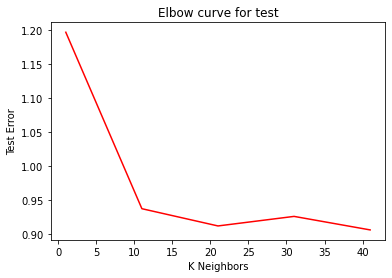

In [57]:
# plotting the curves

plt.plot(k,score,color = 'red')
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow curve for test')

We can see from the above ELBOW curve that the optimum value of k is around 21.

In [49]:
# Creating instance of KNN
reg = KNN(n_neighbors=21)

# Fitting the model
reg.fit(x_train,y_train)

# Predicting over the train set and calculating rmse
test_predict = reg.predict(x_test)
k_1 = sqrt(MSE(test_predict,y_test))
print('Test RMSE is',k_1)

Test RMSE is 0.9115394018508014


## Linear Regression Model

In [50]:
# Separating independent and dependent variables

a = Filtered_data
b = sample_data['trip_duration_hours']
a.shape,b.shape

((100000, 11), (100000,))

In [51]:
# Importing the train test split function

from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=1)
a_train.shape,a_test.shape,b_train.shape,b_test.shape

((80000, 11), (20000, 11), (80000,), (20000,))

In [52]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

In [53]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(a_train,b_train)

LinearRegression()

In [54]:
# Predicting over the Test Set and calculating error
test_predict_2 = lr.predict(a_test)
k_2 = sqrt(MSE(test_predict_2, b_test))
print('Test RMSE    ', k_2 )

Test RMSE     0.722378006063582


In [55]:
# Parameters of Linear Regression
lr.coef_

array([ 1.50441719e+00, -1.63442067e+00, -2.59422442e-02, -2.04529442e-01,
       -3.43957856e+11, -1.33186477e+12, -1.33186477e+12, -1.33186477e+12,
       -1.33186477e+12, -1.33186477e+12, -1.33186477e+12])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

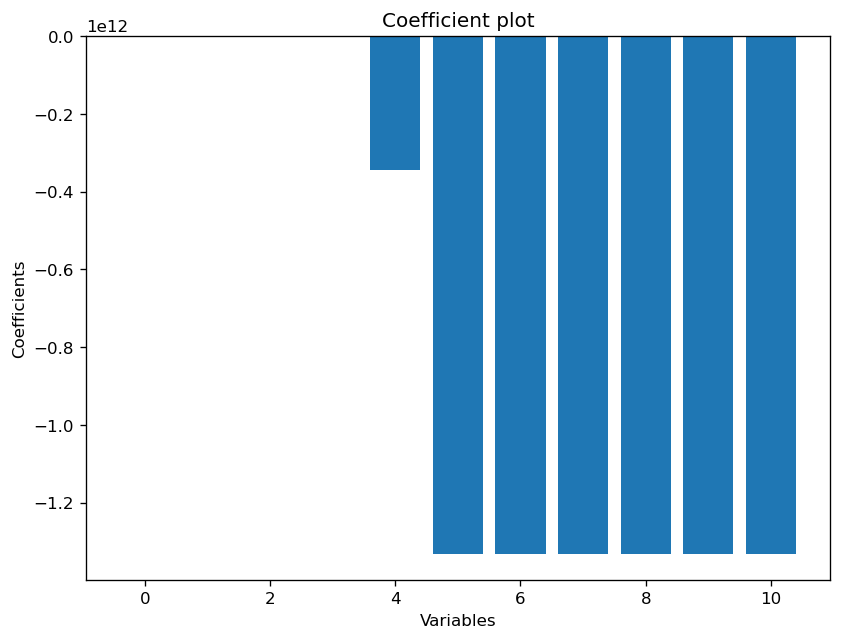

In [56]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='r')
x = range(len(a_train.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Here we can see that the model depends upon some Independent variables toos much, But these coefficients are not suitable for interpretation because these are not scaled

### Checking the assumptions of linear model

In [58]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : b_test,
    'predicted values' : test_predict_2,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
176562,0.231111,0.257568,-0.026457
479297,0.426389,0.276611,0.149778
554524,0.001667,0.744873,-0.743206
494240,0.165278,0.286621,-0.121343
653052,0.138333,0.257080,-0.118747


### Checking Distribution of residuals

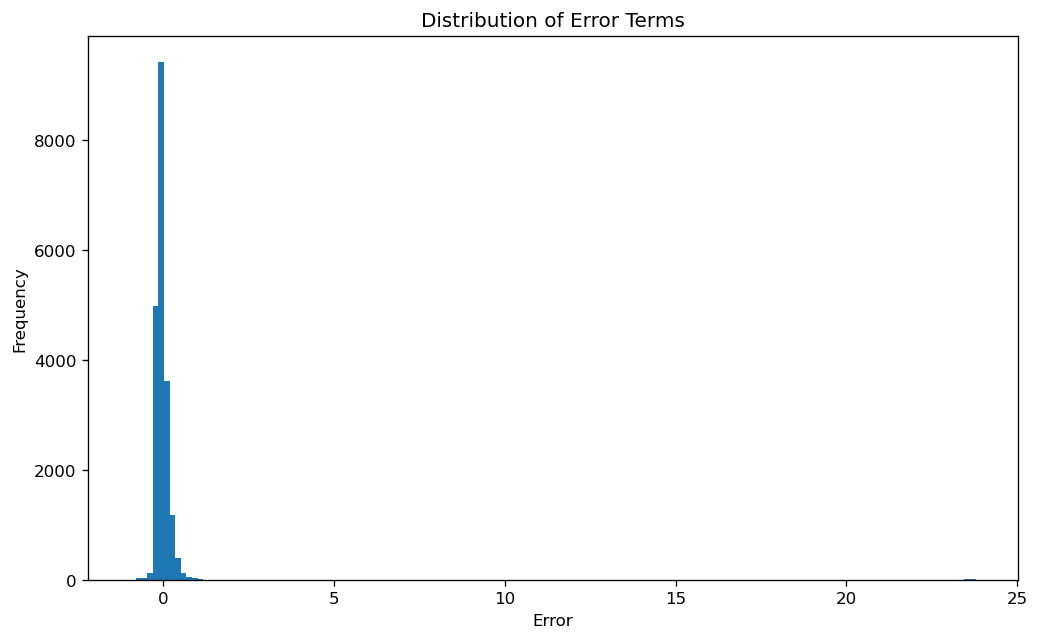

In [59]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

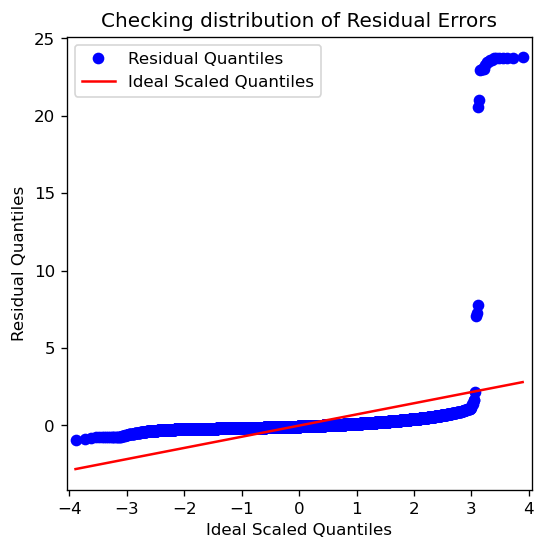

In [75]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.legend(['Residual Quantiles','Ideal Scaled Quantiles'])
plt.show()

*  On computing the coefficients we observed there are some negative values as well.
*  On plotting the qq plot we see that the residual quantile line does'nt fit over all ideal scaled Quantiles.

## Decision Tree Model

In [61]:
# Separating independent and dependent variables

p = Filtered_data
q = sample_data['trip_duration_hours']
p.shape,q.shape

((100000, 11), (100000,))

In [62]:
# Importing the train test split function

from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test = train_test_split(p,q,random_state=25)

In [63]:
#importing Decision Tree Regressor and metric mean square error
from sklearn.tree import DecisionTreeRegressor as tree
from sklearn.metrics import mean_squared_error as MSE

In [64]:
# Creating instance of Decision Tree Regressor
tree = tree()

# Fitting the model
tree.fit(p,q)

DecisionTreeRegressor()

In [65]:
# Predicting over the Test Set and calculating error
test_predict_3 = tree.predict(p_test)
k_3 = sqrt(MSE(test_predict_3, q_test))
print('Test RMSE    ', k_3 )

Test RMSE     0.0013194192980059893


## Scores of all Models

In [66]:
#Calculating train scores of each model
knn_train_score = reg.score(x_train,y_train)
linear_train_score = lr.score(a_train,b_train)
decision_train_score = tree.score(p_train,q_train)

In [67]:
knn_train_score,linear_train_score,decision_train_score

(0.06218552282987655, 0.0020427439432741945, 0.9999999342713259)

In [68]:
#Plotting Model Scores
x=['knn_train_score','linear_train_score','decision_train_score']
y=[0.06218552282987655, 0.0020427439432741945, 0.9999999342713259]

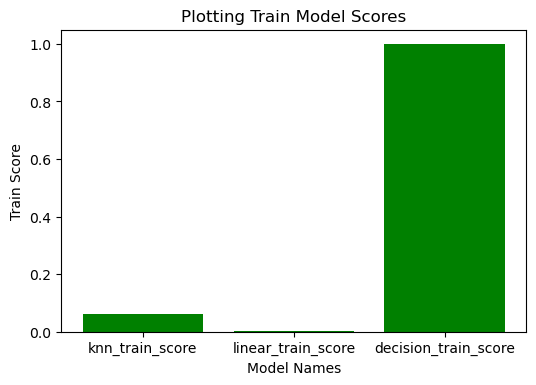

In [69]:
plt.figure(dpi=100)
plt.bar(x,y,color ='green',width = 0.8)
plt.xlabel('Model Names')
plt.ylabel("Train Score")
plt.title('Plotting Train Model Scores')
plt.show()

In [70]:
#Calculating test scores of each model
knn_test_score = reg.score(x_test,y_test)
linear_test_score = lr.score(a_test,b_test)
decision_test_score = tree.score(p_test,q_test)

In [71]:
knn_test_score,linear_test_score,decision_test_score

(-0.14739887868126256, 0.010485708309207586, 0.9999979543731345)

In [72]:
#Plotting Model Scores
x=['knn_test_score','linear_test_score','decision_test_score']
y=[-0.14739887868126256, 0.010485708309207586, 0.9999979543731345]

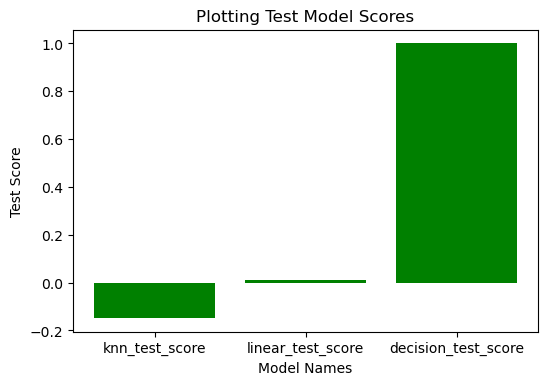

In [73]:
plt.figure(dpi=100)
plt.bar(x,y,color ='green',width = 0.8)
plt.xlabel('Model Names')
plt.ylabel("Test Score")
plt.title('Plotting Test Model Scores')
plt.show()

In [74]:
k_1,k_2,k_3

(0.9115394018508014, 0.722378006063582, 0.0013194192980059893)

*  <b>From the 3 models (KNN,LR,Decision Tree) the train score and test score for Decision Tree is around 0.999 and hence it is the best model for predicting the Trip duration.
    
*  <b>Also the RMSE for Decision Tree model is lowest (k_3 = 0.0013194192980059893)